Preview of sales data:
         Date     Time   StoreID          CustomerID  OrderID Product Name  \
0  10/24/2024  0:00:00  Store001  CustomerStore001_1     4010     Product8   
1  10/24/2024  0:00:00  Store001  CustomerStore001_1     4010     Product5   
2   7/19/2024  0:00:00  Store001  CustomerStore001_1     9312     Product5   
3   7/19/2024  0:00:00  Store001  CustomerStore001_1     9312     Product5   
4   7/19/2024  0:00:00  Store001  CustomerStore001_1     9312     Product2   

   Price  
0  54.97  
1  61.51  
2  66.90  
3  45.69  
4  20.17  

Best-selling items for each store:
StoreID   Product Name
Store001  Product10       10
          Product2        10
          Product4        10
          Product7        10
          Product5         8
          Product8         6
          Product1         5
          Product3         5
          Product6         4
          Product9         3
Store002  Product7        12
          Product2         8
          Product1         7
      

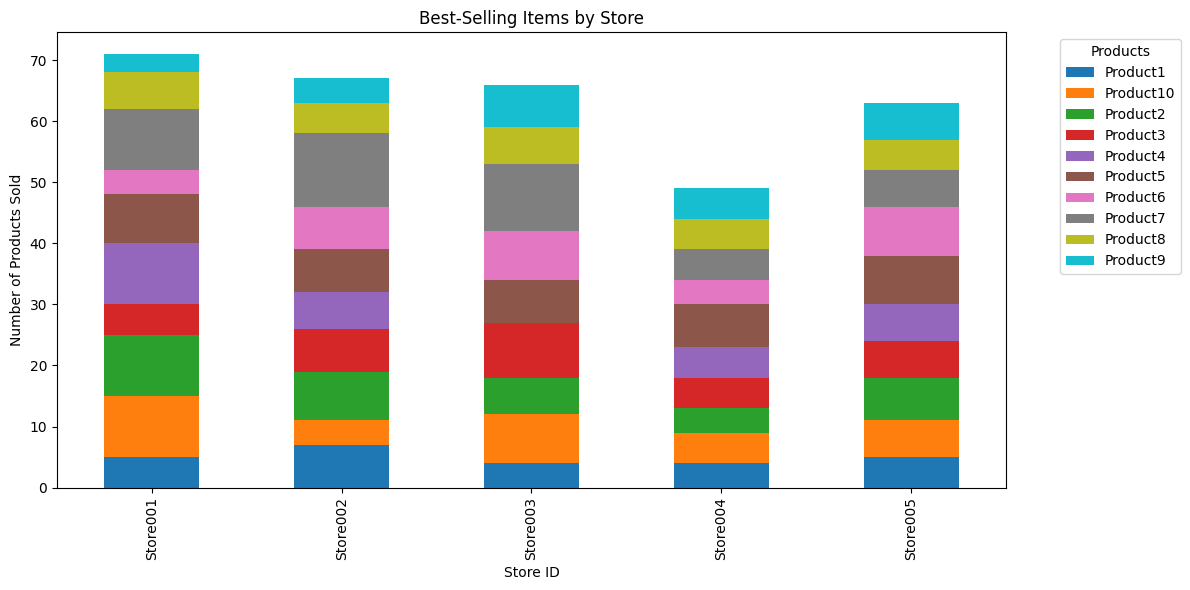


Best-selling items across the corporation:
Product Name
Product7     44
Product5     37
Product2     35
Product10    33
Product3     32
Product6     31
Product8     27
Product4     27
Product1     25
Product9     25
Name: count, dtype: int64


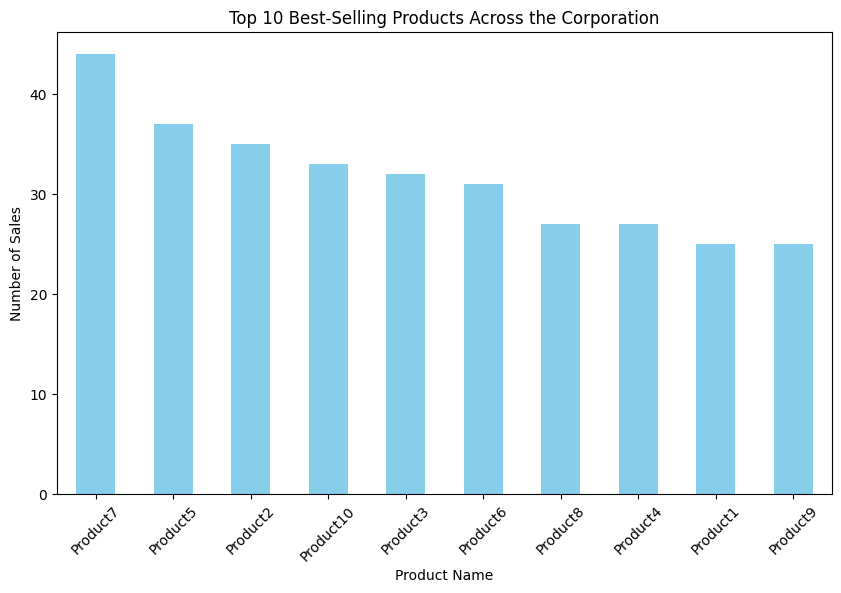

One-Hot Encoded Basket Data (Preview):
   Product1  Product10  Product2  Product3  Product4  Product5  Product6  \
0     False       True     False     False     False      True      True   
1     False      False     False     False     False     False      True   
2     False      False     False      True     False     False      True   
3     False      False     False     False      True     False     False   
4     False      False     False     False      True     False      True   

   Product7  Product8  Product9  
0     False     False      True  
1     False     False     False  
2     False     False     False  
3     False     False      True  
4      True     False     False  

Frequent Itemsets:
     support               itemsets
0   0.141975             (Product1)
1   0.197531            (Product10)
2   0.197531             (Product2)
3   0.179012             (Product3)
4   0.148148             (Product4)
5   0.216049             (Product5)
6   0.179012             (Pr

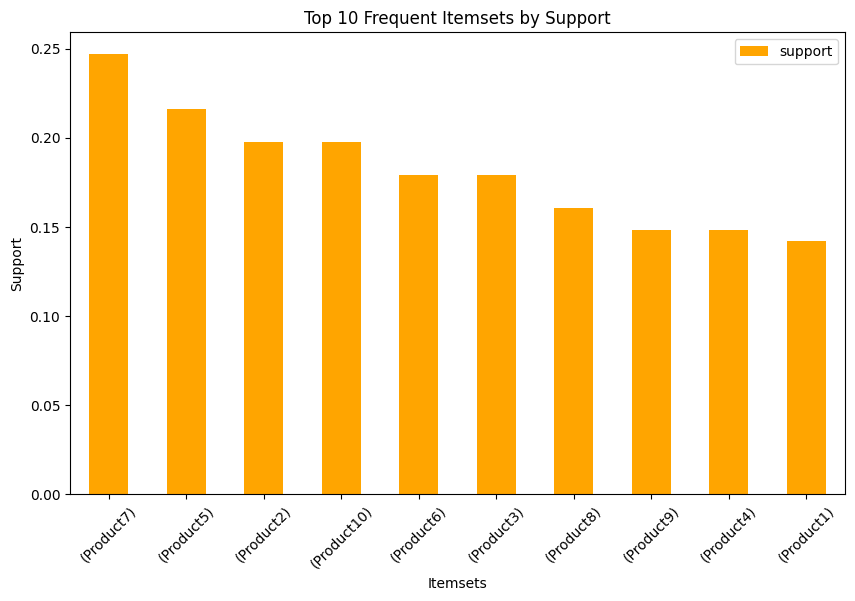


Association Rules:
    antecedents  consequents   support  confidence      lift
0    (Product2)   (Product1)  0.049383    0.250000  1.760870
1    (Product1)   (Product2)  0.049383    0.347826  1.760870
2    (Product4)  (Product10)  0.037037    0.250000  1.265625
3   (Product10)   (Product4)  0.037037    0.187500  1.265625
4    (Product2)   (Product4)  0.037037    0.187500  1.265625
5    (Product4)   (Product2)  0.037037    0.250000  1.265625
6    (Product2)   (Product7)  0.055556    0.281250  1.139063
7    (Product7)   (Product2)  0.055556    0.225000  1.139063
8    (Product3)   (Product5)  0.043210    0.241379  1.117241
9    (Product5)   (Product3)  0.043210    0.200000  1.117241
10   (Product4)   (Product8)  0.024691    0.166667  1.038462
11   (Product8)   (Product4)  0.024691    0.153846  1.038462
12   (Product9)   (Product4)  0.030864    0.208333  1.406250
13   (Product4)   (Product9)  0.030864    0.208333  1.406250
14   (Product7)   (Product5)  0.055556    0.225000  1.041429
15  

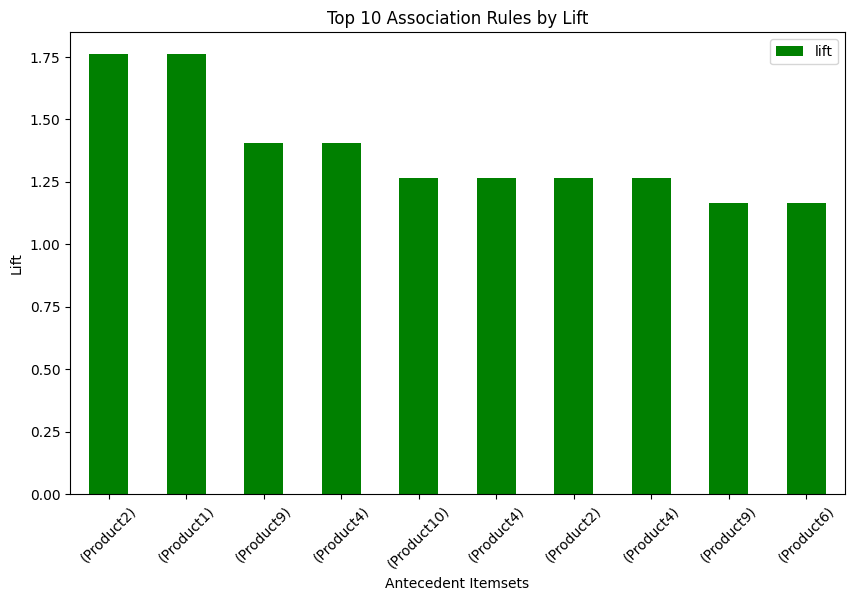

In [3]:
# Project 3: Market Basket Analysis
# Objective: Analyze sales data to identify the best-selling items for each store and across the entire organization. 
# Perform a market basket analysis to discover frequently purchased itemsets.
# This project builds upon the Corporation data from Projects 1 and 2.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load the sales data
df = pd.read_csv('C:/Users/gaelt/Downloads/sales_data new.csv')

# Preview the data
print("Preview of sales data:")
print(df.head())

# Best-Selling Items for Each Store
# Group by StoreID and Product Name to find the counts
store_group = df.groupby('StoreID')['Product Name'].value_counts()

print("\nBest-selling items for each store:")
print(store_group)

# Visualize the top-selling items for each store
store_group.unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Best-Selling Items by Store")
plt.xlabel("Store ID")
plt.ylabel("Number of Products Sold")
plt.legend(title="Products", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Organization-Wide Best Sellers
# Find the best-selling items across the corporation
overall_best_sellers = df['Product Name'].value_counts()

print("\nBest-selling items across the corporation:")
print(overall_best_sellers)

# Visualize the best-selling items across the corporation
overall_best_sellers.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Top 10 Best-Selling Products Across the Corporation")
plt.xlabel("Product Name")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.show()

# Market Basket Analysis - Prepare Data
# Prepare data for market basket analysis
basket_data = df.groupby('OrderID')['Product Name'].apply(list)

# Convert the basket data into a one-hot encoded DataFrame
te = TransactionEncoder()
basket_encoded = te.fit_transform(basket_data)
basket_df = pd.DataFrame(basket_encoded, columns=te.columns_)

print("One-Hot Encoded Basket Data (Preview):")
print(basket_df.head())

# Frequent Itemsets Using Apriori
# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_df, min_support=0.02, use_colnames=True)

print("\nFrequent Itemsets:")
print(frequent_itemsets)

# Visualize the support of the top 10 itemsets
frequent_itemsets.sort_values('support', ascending=False).head(10).plot(
    x='itemsets', y='support', kind='bar', figsize=(10, 6), color='orange')
plt.title("Top 10 Frequent Itemsets by Support")
plt.xlabel("Itemsets")
plt.ylabel("Support")
plt.xticks(rotation=45)
plt.show()

# Generate Association Rules
# Generate association rules from the frequent itemsets
# Use the additional required 'num_itemsets' argument if needed
try:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
except TypeError:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=len(frequent_itemsets))

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Visualize the top rules by lift
rules.sort_values('lift', ascending=False).head(10).plot(
    x='antecedents', y='lift', kind='bar', figsize=(10, 6), color='green')
plt.title("Top 10 Association Rules by Lift")
plt.xlabel("Antecedent Itemsets")
plt.ylabel("Lift")
plt.xticks(rotation=45)
plt.show()
